# COGS 118A - Final Project

# Used Car Market Price Prediction

## Group members

- Jisu Kim
- Taekyu Lee
- Brian Chu
- Richard Li

In [1]:
%%capture download__info
# about ~7s download
%pip install xgboost

In [2]:
# imports for pre-processing
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix

import seaborn as sns

from matplotlib import rcParams
import matplotlib.pyplot as plt


# imports for training model
import xgboost as xgb
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.exceptions import ConvergenceWarning



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# uncomment if running file and these packages aren't installed
# !pip install geopandas
# !pip install Shapely

# **Abstract**

In evaluating the used car market, it often becomes difficult to determine what the ‘correct’ value of a used car is, especially with user-generated listings. We found a dataset with scraped listings off Craigslist for all used vehicles across the country, with a plethora of features that can help us classify listings and predict how much a car ought to be listed for.

We first approach the dataset by analyzing its features, and begin preprocessing with an understanding of which features we found relevant to prediction, as well as visualizing the dataset to better understand what we're working with. During this, we eliminate certain features we found to be commonly omitted, and undergo feature engineering in a way that our data becomes more usable to us.

Finally, we discover that [ model ] is the most viable approach to this problem, with [ results ]. Through this, we realize [ blank .]

# **Background**

Car is one of the vital things in our daily life. Especially in the United States, we may see a significant number of automakers compete for their market and industry every day. While the automakers lunch a different type of brand-new vehicle annually or so, customers get some option to purchase their car, brand new or used. From the past, people might consider that buying a used car is the best option with two aspects, their budget, and sustainability. Among previous options, budget is apparently the biggest factor that people lean on buying a used car. 

There are numerous factors that determine the selling price of a vehicle. We can also confirm that there are a variety of additional costs depending on the model, mileage, fuel consumption, etc. In most cases, the older the car is, the less it is worth. For example, a brand new car may lose 20-30% of its value in only 1-2 years, but the price drop may be slower thereafter. 

People have made a myriad of the attempt to predict the used car price. Especially in the 2010s, with the huge leap in the machine learning technique, people did get even more opportunities to predict the used car price using solid models. In this project, our team's ultimate goal and the aim is to get the highest accuracy using proper ML models and algorithms.

# **Problem Statement**

We are planning to use the supported vector machine and logistic regression to predict the used car price in the current market. During the checkpoint, we were about to use the neural network(model representation) since we had only few features and even needed to drop some columns which we do not need for our prediction. Our dataset was way too small to use a neural network and we decided to implement the svm and logistic regression instead of a neural network since the changed algorithm is enough for our dataset. We use numpy, pandas, sklearn, matplotlib, seaborn and LogisticRegression from sklearn.linear_model. We will import more libraries upon our needs.

# **Data**

## **Dataset**

Used Cars Dataset
Vehicles listings from Craigslist.org

This data is scraped every few months, it contains almost all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.

The dataset originally included

- 26 columns
- 426880 unique value


The column that we kept while the data cleaning process is following : 

region = craigslist region
price = entry price
year = entry year
manufacturer = manufacturer of vehicle
model = model of vehicle
fuel = fuel type
odometer = miles traveled by vehicle
title_status = title status of vehicle
transmission = transmission of vehicle
state = state of listing

The column that we dropped while the data cleaning process is following : 

id = entry ID

url = listing URL

region_url = region URL

condition = condition of vehicle

cylinders = number of cylinders

VIN = vehicle identification number

drive = type of drive

size = size of vehicle

type = generic type of vehicle

paint_color = color of vehicle

image_url  = image URL

description = listed description of vehicle

county = useless column left in by mistake

posting_date = posted date

lat = latitude of listing

long = longitude of listing 


In [4]:
cars = pd.read_csv('vehicles.csv')
cars.sample(5) # random sample to peek at data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
217758,7310383363,https://stcloud.craigslist.org/ctd/d/sauk-cent...,st cloud,https://stcloud.craigslist.org,27995,2018.0,ford,f-150 xlt supercab,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00D0D_2fdh7fUqNy...,"2018 Ford F-150 XLT SuperCab Truck, White Fina...",NaN,mn,45.728100,-94.968200,2021-04-21T11:30:50-0500
253362,7316460149,https://newjersey.craigslist.org/cto/d/wayne-0...,north jersey,https://newjersey.craigslist.org,0,2008.0,acura,tl type s,like new,6 cylinders,...,full-size,sedan,black,https://images.craigslist.org/00N0N_4cj1c60yQT...,"08 Acura TL Type S 99,000 Original Miles ODO C...",NaN,nj,40.947100,-74.246600,2021-05-03T18:02:03-0400
65635,7308822902,https://stockton.craigslist.org/ctd/d/fremont-...,stockton,https://stockton.craigslist.org,23981,2017.0,toyota,rav4,NaN,4 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00e0e_k2JdERlZyo...,This 2017 Toyota RAV4 XLE has been SOLD but ca...,NaN,ca,37.500955,-121.975987,2021-04-18T10:36:31-0700
157907,7309833014,https://desmoines.craigslist.org/ctd/d/waterlo...,des moines,https://desmoines.craigslist.org,3900,2012.0,volkswagen,jetta sedan,excellent,4 cylinders,...,compact,sedan,NaN,https://images.craigslist.org/00B0B_eUteS1WSJP...,2012 Volkswagen Jetta Sedan 4dr Manual S Sedan...,NaN,ia,42.484503,-92.324974,2021-04-20T10:48:24-0500
10260,7316745581,https://phoenix.craigslist.org/cph/ctd/d/chand...,phoenix,https://phoenix.craigslist.org,14450,2018.0,nissan,sentra,NaN,4 cylinders,...,mid-size,sedan,custom,https://images.craigslist.org/01010_gu6udXnhDs...,Most common questions about this vehicle: Wan...,NaN,az,33.224956,-111.795717,2021-05-04T08:45:06-0700


Through exploratory data analysis, our preprocessing, and visualizations, we made many discoveries regarding the feasibility of building a model around this dataset.
* We discovered that many features were simply not generalizable to be used for prediction, and that the dataset omitted many features that we needed to remove,
* we discovered that many listings were not necessarily accurate or listed in bad faith through falsely representing price or mileage, and we had to remove a substantial amount of outliers in a blanket fashion, since we had no way of accurately determining which listings were outliers,
* we discovered the necessity for one hot encoding or label encoding many of the features, and that feature engineering provided us with quantifiable data that could then be passed into our modelling.

## **Preprocessing / EDA** 

### *choosing important features*

We want to select for only the features that would have an impact on our prediction. As such,
- due to lack of relevance, we will remove the `id`, `url`, `region_url`, and `image_url` features;
- due to uniqueness, we will remove the `VIN` and `description` features, since VIN provides no easy information about the vehicle, and the description feature is not easily generalizable enough without undergoing natural language processing on the value;
- due to frequent omission in the dataset, we remove the `posting_date`, `drive,` `type`, `paint_color`, `cylinders`, `size`, `lat`, `long`, and `county` features, since far more than half of our samples do not have this feature (our criteria was more than 100k missing values in that column);
- due to the subjective nature of the self-rating, we remove the `condition` feature as well.

In [5]:
cars = cars.drop(['id', 'url', 'region_url', 'image_url', 'VIN', 'description', 'county', 'posting_date',
                'size', 'condition', 'cylinders', 'drive', 'type', 'paint_color'], axis = 1)

### *removing null data*

Since we want generalizable data, we believe that listings omitting any data ought to not be included. 

In [6]:
cars = cars.dropna()
cars = cars[cars['price']>0]

### *outliers*

Let's take a look at outliers, for quantifiable metrics such as price and mileage, through getting their deciles. 

A common issue with user-generated car listings is that frequently, the listing price is either arbitrarily high, arbitrarily low, or a projected monthly payment price (in the case the listing is made by a dealer) rather than the price of the car. To avoid this issue, we've determined that we need to drop all observations with a negative price, observations with an arbitrarily low price (to avoid the monthly payment issue), and observations with an arbitrarily high price.

Similarly, we discover the issue with mileage. Many listings are set at arbitrarily high mileage values, such as a million. We remove these, as well as listings with arbitrarily low values. 

In [7]:
# get deciles
price_deciles = np.append(np.percentile(cars['price'], np.arange(0, 100, 10)), np.max(cars['price']))
mileage_deciles = np.append(np.percentile(cars['odometer'], np.arange(0, 100, 10)), np.max(cars['odometer']))
print("price deciles:", price_deciles, "\n mileage deciles:", mileage_deciles)

# drop outlier ranges
price, mileage = cars['price'], cars['odometer']
cars = cars[price.between(price.quantile(0.05), price.quantile(0.95))]
cars = cars[mileage.between(mileage.quantile(0.05), mileage.quantile(0.95))]

# check again
new_price_deciles = np.append(np.percentile(cars['price'], np.arange(0, 100, 10)), np.max(cars['price']))
new_mileage_deciles = np.append(np.percentile(cars['odometer'], np.arange(0, 100, 10)), np.max(cars['odometer']))
print("\nnew price deciles:", new_price_deciles, "\n mileage deciles:", new_mileage_deciles)

price deciles: [1.00000000e+00 3.85000000e+03 6.00000000e+03 8.50000000e+03
 1.19000000e+04 1.55000000e+04 1.96200000e+04 2.49900000e+04
 3.05366000e+04 3.79900000e+04 3.73692871e+09] 
 mileage deciles: [       0.     15747.7    30223.     46583.     68000.     87037.
   104940.6   124890.    147064.    178000.  10000000. ]

new price deciles: [ 2100.  4999.  7000.  9500. 12497. 15800. 18995. 23927. 28590. 34590.
 44944.] 
 mileage deciles: [  7619.   22618.   36359.8  53500.   72500.   89730.  105000.  122110.
 140921.2 164000.  203575. ]


### *visualizations*

#### manufacturers

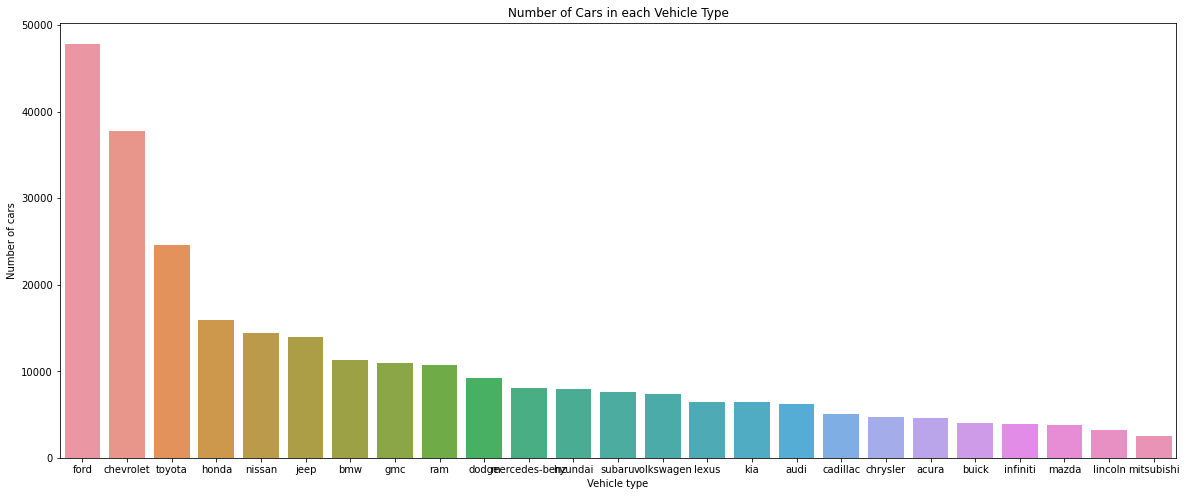

In [8]:
top_manufacturers = cars.manufacturer.value_counts(dropna=False).iloc[:25]

plt.figure(figsize=(20,8))
sns.barplot(x=top_manufacturers.index,y=top_manufacturers.values)
plt.xlabel('Vehicle type')
plt.ylabel('Number of cars')
plt.title('Number of Cars in each Vehicle Type');

#### mileage and year

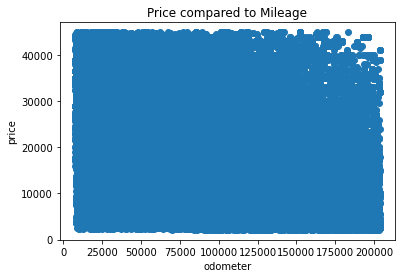

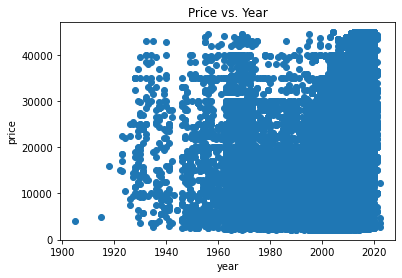

In [9]:
y = cars['price']
x = cars['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.title('Price compared to Mileage')
plt.show()

y = cars['price']
x = cars['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.title('Price vs. Year')
plt.show()

### *Feature Engineering*

Here, we utilize label encoding and one hot encoding to transform certain data into something we can pass into the model, especially data that can't be quantified. 

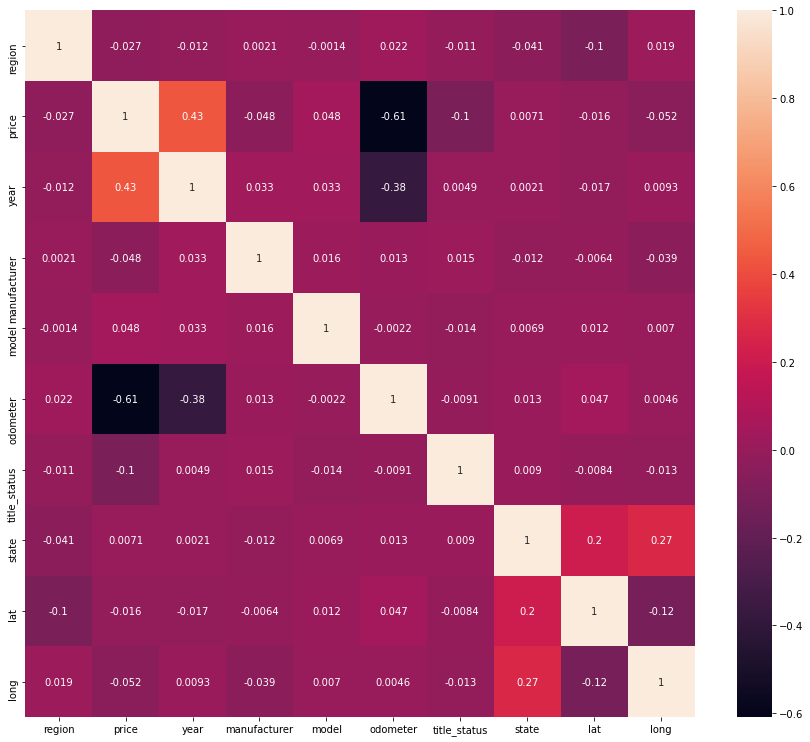

In [10]:
# label

encodeL = preprocessing.LabelEncoder()
llist = ['region', 'manufacturer', 'model', 'title_status', 'state']
cars[llist] = cars[llist].apply(encodeL.fit_transform)


cars["odometer"] = np.sqrt(preprocessing.minmax_scale(cars["odometer"]))

plt.figure(figsize=(15,13))
cor = cars.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [11]:
# one hot

encodeO = preprocessing.OneHotEncoder()
olist = ['fuel', 'transmission']
for col in olist:
	if col in cars.columns:
		carsadd = pd.DataFrame(encodeO.fit_transform(cars[col].array.reshape(-1, 1)).toarray(), index = cars.index)
		cars = pd.concat([cars, carsadd], axis=1).drop([col], axis=1)

In [12]:
carsModel = cars.sample(n=1000, random_state = 42)

In [13]:
# Train-test split with 25% test, 18.75% validation, 57.25% train

# consistent dataset splits
seed = 42

df_train, df_test= train_test_split(carsModel, test_size=0.25, random_state=seed)
df_train, df_val= train_test_split(df_train, test_size=0.25, random_state=seed)
df_train.head()

,region,price,year,manufacturer,model,odometer,title_status,state,lat,long,0,1,2,3,4,0,1,2
409874,312,6995,2000.0,38,3696,0.552270,0,47,47.795658,-122.334714,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
335982,271,25950,2015.0,7,13988,0.654751,0,38,40.341534,-79.759216,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
231124,12,17990,2011.0,16,11359,0.523397,0,27,35.924400,-84.001500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
292681,61,18442,2013.0,33,86,0.791152,0,35,41.476420,-81.723440,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
294300,61,5000,2010.0,13,8415,0.937193,0,35,41.800099,-81.078283,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
# drop price column
X_train1 = df_train.drop(['price'], axis = 1)
y_train1 = df_train['price']

X_val1 = df_val.drop(['price'], axis = 1)
y_val1 = df_val['price']

X_test1 = df_test.drop(['price'], axis = 1)
y_test1 = df_test['price']

# setup KNN for lat n long
X_trainpk = X_train1.drop(['lat','long'], axis = 1)
X_traink = df_train[['lat','long']]

X_valpk = X_val1.drop(['lat','long'], axis = 1)
X_valk = df_val[['lat','long']]

X_testpk = df_test.drop(['lat','long'], axis = 1)
X_testk = df_test[['lat','long']]

# **Proposed Solution**

Our solution will implement linear and logistic regression, support vector machines, random forest classifiers, and cross validation. We will also test the K Nearest Neighbors Regression with the locational values as a layered neural network in addition to the algorithm without the locational values to compare with using the locational values as part of the algorithm. We use numpy, pandas, sklearn, matplotlib, seaborn libraries.

The link below is our benchmark model dealing with linear regression among a few others that have used the same dataset to train their model.

Comparing these different combinations of approaches and algorithms allows us to evaluate performance of the models that have different levels of complexity while being able to modify parameters to find the optimal model.


https://www.kaggle.com/code/vbmokin/used-cars-price-prediction-by-15-models

# **Evaluation Metrics**

We are using a regression model to predict used car prices, so we will use Mean Squared Error and Mean Squared Log Error, since it nullifies the effect of outliers, as some used supercars may be a very large outlier. Mean square error takes the average of the square of predicted error, the predicted value difference to the actual true value. This is a good evaluation metric, since it gives us a numerical variance of the pricing predictions. We also use mean absolute error and mean absolute percentage error, which doesn’t penalize large values as much as mean square error, but the percentage gives us a different viewpoint. Overall, we can use the r-squared scoring to see the correlation among the attributes of each used car and true or predicted pricing.

In [15]:
scaler = StandardScaler()

def scoring(y_train, y_predicted):
    # ['MSE', 'MSLE', 'MAE', 'MAPE', 'R2']
    mse = mean_squared_error(y_train, y_predicted)
    try:
        msle = mean_squared_log_error(y_train, y_predicted)
    except:
        msle = 0
    mae = mean_absolute_error(y_train, y_predicted)
    mape = mean_absolute_percentage_error(y_train, y_predicted)
    r2 = r2_score(y_train, y_predicted)
    return [mse, msle, mae, mape, r2]

# **Results**

#### Linear Regression

In [16]:
modelLI = LinearRegression().fit(X_train1, y_train1)
y_pred1LI = modelLI.predict(X_train1)
modelLI.score(X_test1, y_test1)

0.5037488304491067

In [17]:
scoring(y_train1, y_pred1LI)

[57682514.402621776,
 0,
 5922.512286145776,
 0.5060348133875044,
 0.49662266119859755]

#### Logisitic Regression

In [18]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logistic = LogisticRegression(C=0.01, penalty='l1',solver='liblinear')

pipeLR = Pipeline(steps=[("scaler", scaler), ("imputer", imp), ("logistic", logistic)])
pipeLR.fit(X_train1, y_train1)
pipeLR.score(X_test1, y_test1)

0.004

In [19]:
pipeLR.fit(X_train1, y_train1)  
y_pred1LR = pipeLR.predict(X_train1)
scoring(y_train1, y_pred1LR)

[154659227.72241992,
 0.5439770151110105,
 9263.338078291816,
 0.5971667881633733,
 -0.3496629139393639]

In [48]:
param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}

gcv = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv=2, verbose=True)
best = gcv.fit(X_val1, y_val1)

Fitting 2 folds for each of 42 candidates, totalling 84 fits


In [49]:
print(best.best_score_)
print(best.best_params_)
print(best.cv_results_)
print(best.score(X_test1, y_test1))

0.02127659574468085
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
{'mean_fit_time': array([9.76443291e-04, 5.55396080e-04, 1.21322870e-02, 1.99861956e+00,
       7.10572004e-02, 2.04422474e-02, 3.84569168e-04, 3.68356705e-04,
       2.33453512e-02, 2.06570935e+00, 6.42782450e-02, 2.81949043e-02,
       3.77774239e-04, 4.24385071e-04, 8.77099037e-02, 2.17409456e+00,
       5.98366261e-02, 3.38833332e-02, 3.60846519e-04, 3.44038010e-04,
       3.96802306e-01, 2.10166287e+00, 6.98866844e-02, 4.43997383e-02,
       4.03881073e-04, 3.67879868e-04, 9.03492570e-01, 1.94510221e+00,
       6.23201132e-02, 4.51225042e-02, 1.73223019e-03, 3.56435776e-04,
       6.51607513e-01, 1.90966690e+00, 6.46368265e-02, 5.09492159e-02,
       4.64081764e-04, 3.47137451e-04, 4.19149399e-01, 2.14243245e+00,
       6.14906549e-02, 4.58818674e-02]), 'std_fit_time': array([3.87549400e-04, 1.58548355e-05, 5.01275063e-04, 3.93340588e-02,
       5.99563122e-03, 3.67641449e-04, 7.39097595e-06, 2.38418579e-07,
 

#### Logisitic Regression with KNN Regression

In [20]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logistic = LogisticRegression(C=0.5, penalty='elasticnet',solver='saga', l1_ratio = 0.5)
pipeLRK = Pipeline(steps=[("scaler", scaler), ("imputer", imp), ("logistic", logistic)])
pipeLRK.fit(X_trainpk, y_train1)
y_pred1LRK = pipeLRK.predict(X_trainpk)
scoring(y_train1, y_pred1LRK)

[93387282.08540925,
 0.3696520771668765,
 6742.601423487545,
 0.4227243394431131,
 0.18503827336776868]

In [21]:
kNR = KNeighborsRegressor(n_neighbors=3)
kNR.fit(X_traink, y_pred1LRK)
y_predk = kNR.predict(X_traink)
scoring(y_train1, y_predk)

[107433400.77382363,
 0.4412506271040967,
 7818.623962040333,
 0.6151871049252203,
 0.06246217003581489]

#### Random Forest Classifiers

##### Initial Random Hyperparameters

In [22]:
rf = RandomForestClassifier(n_jobs = -1)
pipeRFC = Pipeline(steps=[("scaler", scaler), ("rf", rf)])
pipeRFC.fit(X_train1, y_train1)
pipeRFC.score(X_test1, y_test1)

0.012

#### Grid Search Best Hyperparameters

In [23]:
param_grid = {'rf__max_depth': (100, 500), 'rf__min_samples_split': (2, 5)}
gscv = GridSearchCV(estimator = pipeRFC, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs=-1)
gscv.fit(X_val1, y_val1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': (100, 500),
                         'rf__min_samples_split': (2, 5)},
             scoring='accuracy')

In [24]:
print(gscv.best_score_)
print(gscv.best_params_)
print(gscv.cv_results_)

0.03203223767383059
{'rf__max_depth': 100, 'rf__min_samples_split': 2}
{'mean_fit_time': array([1.62026978, 1.56395845, 1.83056784, 1.15958261]), 'std_fit_time': array([0.09669631, 0.12366358, 0.07271843, 0.34185118]), 'mean_score_time': array([0.29298973, 0.234728  , 0.23978276, 0.08874598]), 'std_score_time': array([0.07427927, 0.05218679, 0.03839609, 0.02526193]), 'param_rf__max_depth': masked_array(data=[100, 100, 500, 500],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_rf__min_samples_split': masked_array(data=[2, 5, 2, 5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'rf__max_depth': 100, 'rf__min_samples_split': 2}, {'rf__max_depth': 100, 'rf__min_samples_split': 5}, {'rf__max_depth': 500, 'rf__min_samples_split': 2}, {'rf__max_depth': 500, 'rf__min_samples_split': 5}], 'split0_test_score': array([0.02654867, 0.02654867, 0.02654867, 0.02654867]), 'split1_te

In [28]:
gscv.score(X_test1, y_test1)

0.032

In [29]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 10),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

gcv = GridSearchCV(pipe, param_grid = param_grid, cv = 2, verbose=True, scoring = 'neg_mean_squared_error', n_jobs=-1)
best = gcv.fit(X_val1, y_val1)

Fitting 2 folds for each of 80 candidates, totalling 160 fits


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("L

In [30]:
print(best.best_score_)
print(best.best_params_)
print(best.cv_results_)

-133736362.36702128
{'classifier': RandomForestClassifier(max_features=6, n_estimators=40), 'classifier__max_features': 6, 'classifier__n_estimators': 40}
{'mean_fit_time': array([0.02279997, 0.03060079, 0.02273583, 0.03537869, 0.02632332,
       0.03145051, 0.05029011, 0.03682637, 0.26286721, 0.04309094,
       0.73177958, 0.04918647, 1.06537211, 0.05404544, 0.75711989,
       0.0600971 , 0.51088524, 0.05904531, 0.32941616, 0.05873346,
       0.01737607, 0.03389335, 0.05048227, 0.06371772, 0.08147407,
       0.1029985 , 0.11222196, 0.13042879, 0.14326429, 0.16321027,
       0.02272654, 0.04444671, 0.06405294, 0.08619308, 0.10840392,
       0.12532747, 0.14535081, 0.17138624, 0.18689191, 0.22239816,
       0.02697098, 0.0517993 , 0.07440865, 0.10433757, 0.12744892,
       0.16662133, 0.19158328, 0.20271444, 0.24686015, 0.25138152,
       0.00544286, 0.00853932, 0.01097119, 0.01249647, 0.01557136,
       0.02036035, 0.02401459, 0.02272713, 0.02552962, 0.03048658,
       0.00521314, 0.00

In [31]:
best.score(X_test1, y_test1)

-114759897.728

### Subsection 3
We are implementing the SVC from sklearn.svm and logistic regression from sklearn.linear_model. We train our model with logistic regression(LogisticRegression). First of all, we initialize the scaler object, the simple imputer and the logistic regression from the linear model. We built the pipeline with the steps of scaler, imputer and logistic regression. We have been through the Grid Search cross validation with the pipeline, our parameter grid and cv = 7.

# **Discussion**

## *Limitations*

Undoubtedly, we encountered many limitations during this process, both pertaining to the data and with our ability to model the data.

1. the outliers we removed from the dataset were done so in a blanket fashion, by simply removing the extremities of two features - we perhaps removed many valid samples in doing so, yet could not devise a better alternative
2. the time it took to run the training heavily limited our ability to make iterative changes - the runtime often went into the hours, so we often had the approach of designing a model such that we hoped it would work as we intended, since we knew any small change thereafter would take hours to remedy, furthering dampening collaboration due to scheduling concerns and dependencies.
3. the data we used was publicly sources as listing prices, which can be arbitarily set as desired - there can be no access inherently to the actual *sale* price of these cars, which is a much more valuable metric for prediction
4. since these are market listings, we do not know if sales ever took place as a result of these listings.

# **Ethics and Privacy**

Given the nature of the project, we believe that we will not be in possession of any personally identifiable information that holds a risk to the persons in question. However, we understand that in processing vehicular sales data, the VIN or identifiable information pertaining to the car is revealed in sales ads, and so on. This provides us with records of car maintenance and thereby the locations of previous owners, which may hold a risk. However, this is not unique to the dataset, but rather openly provided information for the sake of transparency - products such as CARFAX have been using this information for buyer transparency without any apparent ethical violations. Additionally, the inclusion of coordinates as far as where a vehicle is located presents itself as a privacy risk as well, and was omitted not only due to this, but also due to being inaccurate since many listings were found to originate from the middle of the ocean (thereby also mitigating the privacy issue).

In that sense, we are aware but not concerned about privacy risks We spent significant time trying to imagine the ethical implications of such a project. It is entirely true that every machine learning project is liable to have intrinsic interactions with ethics, but in this case we think that these pertain to how such a project can be used, rather than in the making of the project. For example, the outputs of our model could be used to monitor car prices, and manipulate sales as opposed to an organic market. However, such metrics of what cars are “worth” and “market value” have already been established, and we believe the likely usage of this model would be to track the perpetuation of car values in a market heavily impacted by the pandemic and its ensuing shortages in components.

# **Conclusion** 

Through our exploratory data analysis, general trends, such as price vs. mileage, are evident, but our models ultimately did not attain high accuracies in correctly predicting car list prices - i.e., 0.51 score for linear regression. We believe that future approaches when greater computational power is availed to us could deliver better results, such that we could use GridSearch with proper parameters or neural networks. 